In [1]:
import pandas as pd
df = pd.read_csv('data/Recurrence free survival in breast cancer patients.csv')
df

,id,treat,age,men,size,grade,nodes,prog,oest,time,status
0,1,0,70,2,21,2,3,48,66,1814,1
1,2,1,56,2,12,2,7,61,77,2018,1
2,3,1,58,2,35,2,9,52,271,712,1
3,4,1,59,2,17,2,4,60,29,1807,1
4,5,0,73,2,35,2,1,26,65,772,1
...,...,...,...,...,...,...,...,...,...,...,...
681,682,0,49,1,30,3,3,1,84,721,0
682,683,1,53,2,25,3,17,0,0,186,0
683,684,0,51,1,25,3,5,43,0,769,1
684,685,0,52,2,23,2,3,15,34,727,1


In [2]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['time'], event_observed=df['status'])
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
8.0,1.000000
15.0,1.000000
16.0,1.000000
17.0,1.000000
...,...
2551.0,0.342758
2556.0,0.342758
2563.0,0.342758


<Axes: xlabel='timeline'>

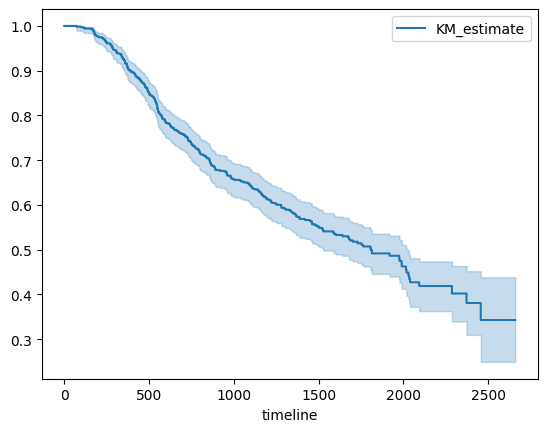

In [3]:
kmf.plot_survival_function()

In [4]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter(nelson_aalen_smoothing=False)
naf.fit(df['time'], event_observed=df['status'])
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
8.0,0.000000
15.0,0.000000
16.0,0.000000
17.0,0.000000
...,...
2551.0,1.060633
2556.0,1.060633
2563.0,1.060633


<Axes: xlabel='timeline'>

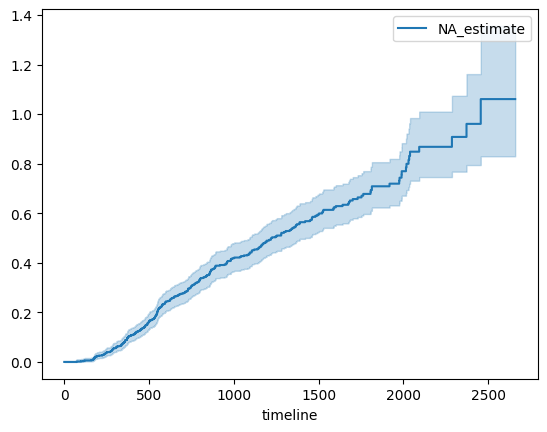

In [5]:
naf.plot_cumulative_hazard()

<Axes: >

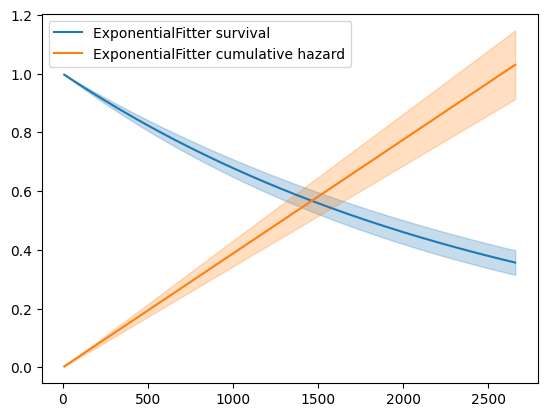

In [6]:
from lifelines import ExponentialFitter
exf = ExponentialFitter().fit(df['time'], df['status'])
exf.plot_survival_function(label='ExponentialFitter survival')
exf.plot_cumulative_hazard(label='ExponentialFitter cumulative hazard')

<Axes: >

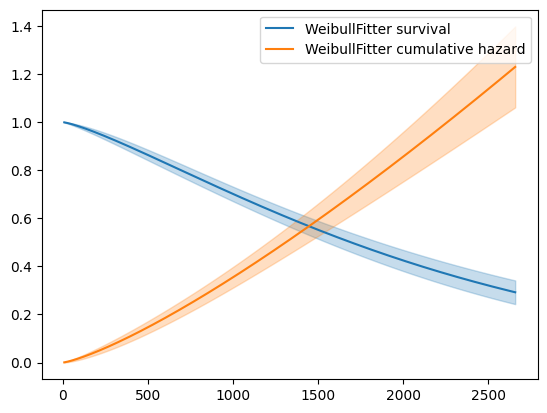

In [7]:
from lifelines import WeibullFitter
wbf = WeibullFitter().fit(df['time'], df['status'], label='WeibullFitter')
wbf.plot_survival_function(label='WeibullFitter survival')
wbf.plot_cumulative_hazard(label='WeibullFitter cumulative hazard')

<Axes: xlabel='timeline'>

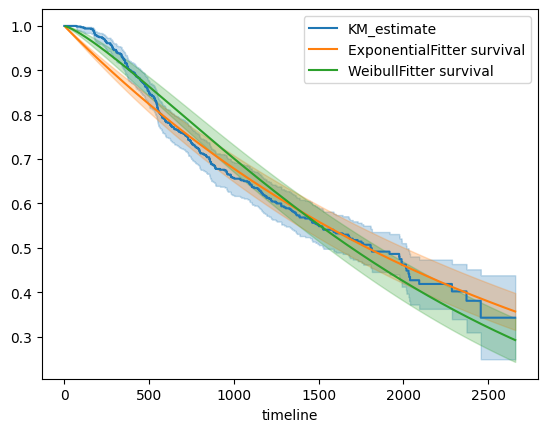

In [8]:
kmf.plot_survival_function()
exf.plot_survival_function(label='ExponentialFitter survival')
wbf.plot_survival_function(label='WeibullFitter survival')

In [9]:
print('Exponential model: ', exf.AIC_)
print('Weibull model: ', wbf.AIC_)

Exponential model:  5297.600213316617
Weibull model:  5278.552727170619


<lifelines.CoxPHFitter: fitted with 686 total observations, 387 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 686
number of events observed = 299
   partial log-likelihood = -1737.17
         time fit was run = 2024-10-09 07:06:55 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
id         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
treat      -0.34       0.72       0.13            -0.59            -0.08                 0.55                 0.92
age        -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
men         0.27       1.31       0.18            -0.09             0.63                 0.91                 1.87
size        0.01       1.01       0.00            -0.00             0.02                 1.00                 1.02
grade       0.28       1.32       0.11             0.07             0.49                 1.08                 1.63
nodes       0.05       1.05       0.01             0.03             0.06                 1.04                 1.07
prog       -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
oest        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
id            0.00 -0.13   0.90       0.16
treat         0.00 -2.58   0.01       6.66
age           0.00 -1.02   0.31       1.70
men           0.00  1.46   0.14       2.79
size          0.00  1.96   0.05       4.31
grade         0.00  2.65   0.01       6.94
nodes         0.00  6.62 <0.005      34.66
prog          0.00 -3.88 <0.005      13.25
oest          0.00  0.39   0.70       0.52
---
Concordance = 0.69
Partial AIC = 3492.33
log-likelihood ratio test = 101.88 on 9 df
-log2(p) of ll-ratio test = 57.08

<Axes: xlabel='log(HR) (95% CI)'>

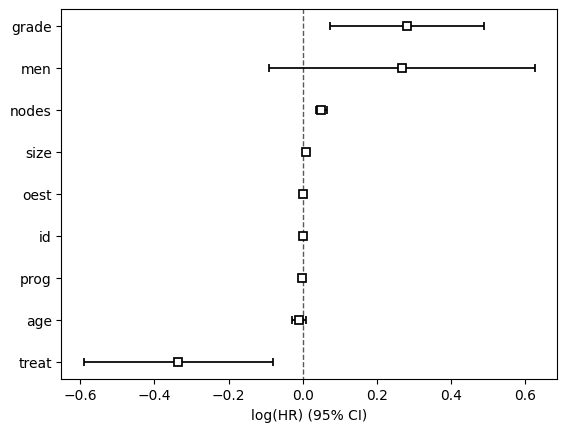

In [10]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df[['id', 'treat', 'age', 'men', 'size', 'grade', 'nodes', 'prog', 'oest', 'time', 'status']], duration_col='time', event_col='status')
cph.print_summary()
cph.plot()

<Axes: >

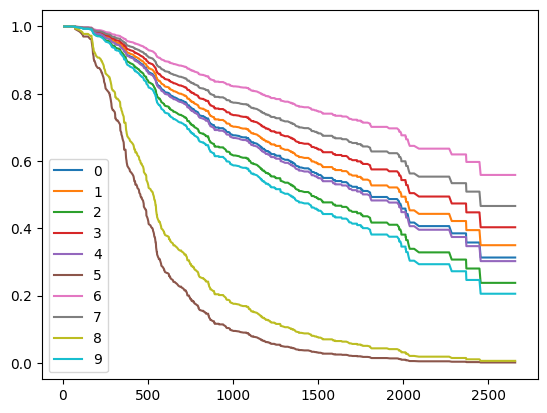

In [11]:
cph.predict_survival_function(df.iloc[:10]).plot()

In [12]:
cph.predict_expectation(df)

0      1663.266603
1      1730.431856
2      1513.529919
3      1823.184176
4      1643.027966
          ...     
681    1403.033319
682    1010.278667
683    1452.362376
684    1502.880075
685    1473.384459
Length: 686, dtype: float64

In [13]:
cph.predict_median(df)

0      1814.0
1      1990.0
2      1460.0
3      2093.0
4      1806.0
        ...  
681    1253.0
682     762.0
683    1343.0
684    1449.0
685    1371.0
Name: 0.5, Length: 686, dtype: float64